## Weighted geometric median pixel composite mosaics

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import hdstats
import joblib

In [3]:
ds = joblib.load('data/6mp63x30.pkl.xz')

In [4]:
times, data = ds

In [14]:
data.shape

(1024, 976, 10, 111)

Generate simple weight features based on the spectral information in the pixel $\mathbb{x} = (x_1, \ldots, x_p)^T$. These features have the form
\begin{equation}\label{feature}
f(\mathbb{x}) = \frac{x_i-x_j}{x_i+x_j}\left(\frac{\alpha_1(x_1-\gamma_1)+ \cdots + \alpha_p(x_p - \gamma_p) + \rho}{\beta_1(x_1-\sigma_1)+ \cdots + \beta_p (x_p - \sigma_p) + \delta}\right)
\end{equation}
for some choice of $i,j$ and for vectors $\alpha = (\alpha_1, \ldots, \alpha_p)^T$, $\gamma = (\gamma_1, \ldots, \gamma_p)^T$, $\beta = (\beta_1, \ldots ,\beta_p)^T$, $\sigma = (\sigma_1, \ldots, \sigma_p)^T$ and constants $\rho$, $\delta$.

In [6]:
gm = hdstats.nanwgeomedian_pcm(data, num_threads=28)

In [13]:
gm.shape

(1024, 976, 10)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


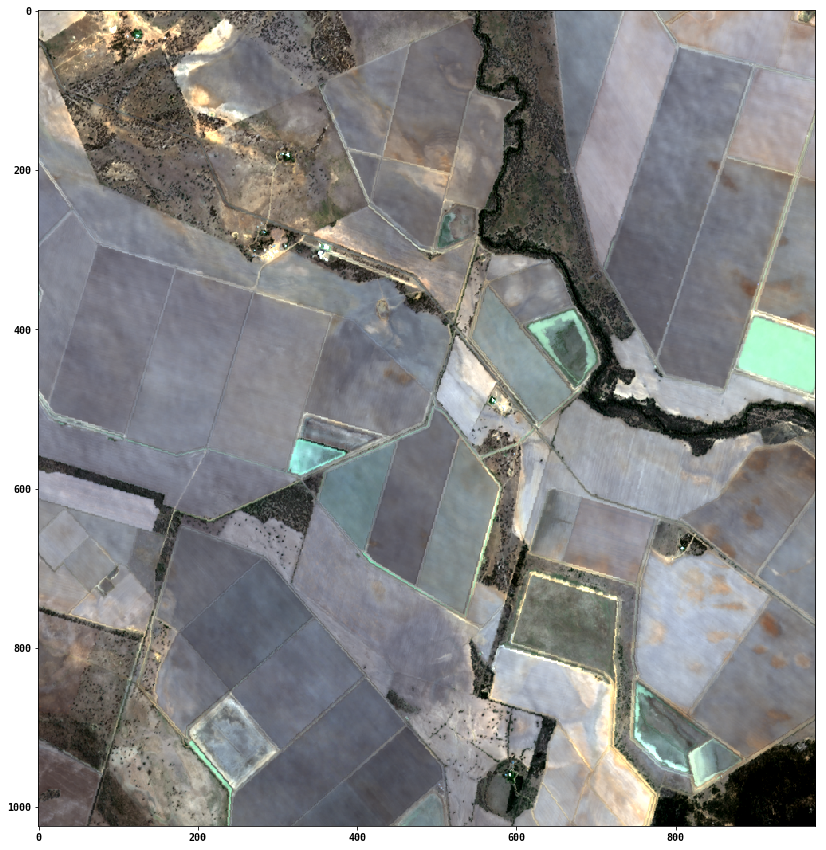

In [12]:
img = gm[:,:,[2,1,0]].copy()
for i in range(img.shape[-1]):
    dd=img[:,:,i]
    mu = np.mean(dd)
    sd = np.std(dd)
    pl, pu = mu - 3*sd, mu + 3*sd
    dd[dd<pl], dd[dd>pu] = pl, pu
    dd -= pl
    dd /= (pu - pl)
plt.figure(figsize=(15,15))
plt.imshow(img)